In [1]:
from pathlib import Path
import pandas as pd

from utils import *
from dataloaders import *
from data_preparation import *
from allResNets import *
from MobileNetV3 import *
from engine import *
from efficientNet import *
from data_transforms import *

change_to_disk()
data_dir = Path("clean_split_1k/")
models_path = Path('Models/')
saves = Path('Trainning_results_saves/')

In [2]:
image_shape = (1920, 1080)
resize_factor = 0.3
resize = np.multiply(image_shape,resize_factor)
resize = [int(resize[1]), int(resize[0])]

data_transform = create_transform(resize=resize, rotate=180, color_dev=True, transf_tensor=True, normalize=True)

BATCH_SIZE = 16
train_dl, validation_dl, test_dl, train_data, validation_data, test_data, class_names = create_dataloaders(data_dir, data_transform, batch_size = BATCH_SIZE)

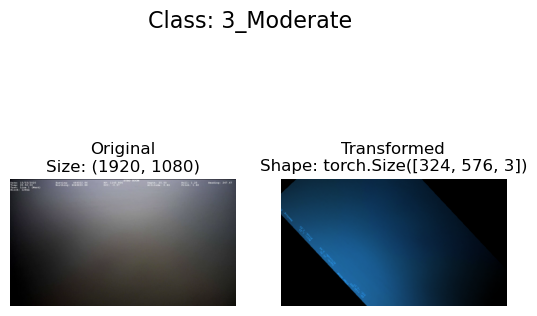

In [3]:
list_imgs = list(data_dir.glob("*/*/*.png"))

plot_transformed_images(image_paths=list_imgs,
                        transform=data_transform,
                        n=1,
                        seed=None)

In [3]:
NUM_EPOCHS = 100
lr = 0.001
device = get_device()

resnet18 = ResNet18()
resnet50 = ResNet50()
mobnet_sml = MobileNetV3("small")
mobnet_lrg = MobileNetV3("large")
effnetb0 = EfficientNetB0()
effnetb5 = EfficientNetB5()

loss_fn = nn.CrossEntropyLoss()

In [5]:
model_name = "ResNet18"
model_folder_path = models_path / model_name
model_name_folder_path = model_folder_path / model_name

#Train ResNet18
resnet18.to(device)
nadam_optim = torch.optim.NAdam(params=resnet18.parameters(), lr=lr)
train_resnet18_results, train_time_resnet18 = train(resnet18, train_dl, validation_dl, optimizer=nadam_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, name_save=model_name_folder_path, device=device)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0776 | train_acc: 0.5125 | validation_loss: 0.9242 | validation_acc: 0.5137
Epoch: 2 | train_loss: 0.8103 | train_acc: 0.6288 | validation_loss: 2.2796 | validation_acc: 0.3809
Epoch: 3 | train_loss: 0.7487 | train_acc: 0.6538 | validation_loss: 0.7946 | validation_acc: 0.6406
Epoch: 4 | train_loss: 0.6703 | train_acc: 0.6930 | validation_loss: 0.6251 | validation_acc: 0.6953
Epoch: 5 | train_loss: 0.6349 | train_acc: 0.7007 | validation_loss: 0.5369 | validation_acc: 0.7676
Epoch: 6 | train_loss: 0.6041 | train_acc: 0.7248 | validation_loss: 0.7129 | validation_acc: 0.6602
Epoch: 7 | train_loss: 0.5620 | train_acc: 0.7290 | validation_loss: 1.6000 | validation_acc: 0.5469
Epoch: 8 | train_loss: 0.5603 | train_acc: 0.7358 | validation_loss: 1.0185 | validation_acc: 0.6582
Epoch: 9 | train_loss: 0.5285 | train_acc: 0.7545 | validation_loss: 0.6760 | validation_acc: 0.7227
Epoch: 10 | train_loss: 0.5234 | train_acc: 0.7568 | validation_loss: 0.6470 | validation_a

In [6]:
eval_resnet18_results = eval_model(resnet18, test_dl, loss_fn = loss_fn, accuracy_fn=accuracy_fn, device = device, dummy_input= torch.rand(32,3,224,224).to(device))
resnet18_results = [train_resnet18_results, train_time_resnet18, eval_resnet18_results]
final_save(model_folder_path,model_name, NUM_EPOCHS, resnet18, resnet18_results)

  0%|          | 0/32 [00:02<?, ?it/s]

In [4]:
model_name = "ResNet50"
model_folder_path = models_path / model_name
check_dir(model_folder_path)
model_name_folder_path = model_folder_path / model_name

#Train ResNet50
resnet50.to(device)
nadam_optim = torch.optim.NAdam(params=resnet50.parameters(), lr=lr)
train_resnet50_results, train_time_resnet50 = train(resnet50, train_dl, validation_dl, optimizer=nadam_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, name_save=model_name_folder_path, device=device)

Models\ResNet50 does not exist, creating one...


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.2318 | train_acc: 0.4455 | validation_loss: 0.8902 | validation_acc: 0.6074
Epoch: 2 | train_loss: 0.9430 | train_acc: 0.5617 | validation_loss: 0.8042 | validation_acc: 0.6406
Epoch: 3 | train_loss: 0.8955 | train_acc: 0.5935 | validation_loss: 2.5553 | validation_acc: 0.2695
Epoch: 4 | train_loss: 0.7870 | train_acc: 0.6265 | validation_loss: 0.8856 | validation_acc: 0.5996
Epoch: 5 | train_loss: 0.7075 | train_acc: 0.6558 | validation_loss: 0.6519 | validation_acc: 0.7012
Epoch: 6 | train_loss: 0.7224 | train_acc: 0.6567 | validation_loss: 0.6812 | validation_acc: 0.7070
Epoch: 7 | train_loss: 0.6552 | train_acc: 0.6793 | validation_loss: 0.6221 | validation_acc: 0.6738
Epoch: 8 | train_loss: 0.6396 | train_acc: 0.6977 | validation_loss: 1.6971 | validation_acc: 0.5098
Epoch: 9 | train_loss: 0.6849 | train_acc: 0.6757 | validation_loss: 0.5289 | validation_acc: 0.7500
Epoch: 10 | train_loss: 0.6169 | train_acc: 0.7035 | validation_loss: 1.0261 | validation_a

In [5]:
eval_resnet50_results = eval_model(resnet50, test_dl, loss_fn = loss_fn, accuracy_fn=accuracy_fn, device = device, dummy_input= torch.rand(32,3,224,224).to(device))
resnet50_results = [train_resnet50_results, train_time_resnet50, eval_resnet50_results]
final_save(model_folder_path,model_name, NUM_EPOCHS, resnet50, resnet50_results)

  0%|          | 0/32 [00:01<?, ?it/s]

In [6]:
model_name = "MobileNetSmall"
model_folder_path = models_path / model_name
check_dir(model_folder_path)
model_name_folder_path = model_folder_path / model_name

#Train MobileNetV3 Small
mobnet_sml.to(device)
nadam_optim = torch.optim.NAdam(params=mobnet_sml.parameters(), lr=lr)
train_mobnet_sml_results, train_time_mobnet_sml = train(mobnet_sml, train_dl, validation_dl, optimizer=nadam_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, name_save=model_name_folder_path, device=device)

Models\MobileNetSmall does not exist, creating one...


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.9456 | train_acc: 0.5550 | validation_loss: 0.7027 | validation_acc: 0.6562
Epoch: 2 | train_loss: 0.7591 | train_acc: 0.6482 | validation_loss: 0.5891 | validation_acc: 0.7422
Epoch: 3 | train_loss: 0.6714 | train_acc: 0.6865 | validation_loss: 0.6287 | validation_acc: 0.6777
Epoch: 4 | train_loss: 0.6266 | train_acc: 0.7083 | validation_loss: 3.6283 | validation_acc: 0.4629
Epoch: 5 | train_loss: 0.5913 | train_acc: 0.7150 | validation_loss: 0.5729 | validation_acc: 0.7441
Epoch: 6 | train_loss: 0.5525 | train_acc: 0.7430 | validation_loss: 0.6586 | validation_acc: 0.7422
Epoch: 7 | train_loss: 0.5515 | train_acc: 0.7355 | validation_loss: 0.6525 | validation_acc: 0.7246
Epoch: 8 | train_loss: 0.5211 | train_acc: 0.7422 | validation_loss: 0.9005 | validation_acc: 0.6660
Epoch: 9 | train_loss: 0.5188 | train_acc: 0.7558 | validation_loss: 0.7912 | validation_acc: 0.7285
Epoch: 10 | train_loss: 0.4837 | train_acc: 0.7660 | validation_loss: 0.8640 | validation_a

In [7]:
eval_mobnet_sml_results = eval_model(mobnet_sml, test_dl, loss_fn = loss_fn, accuracy_fn=accuracy_fn, device = device, dummy_input= torch.rand(32,3,224,224).to(device))
mobnet_sml_results = [train_mobnet_sml_results, train_time_mobnet_sml, eval_mobnet_sml_results]
final_save(model_folder_path,model_name, NUM_EPOCHS, mobnet_sml, mobnet_sml_results)

  0%|          | 0/32 [00:02<?, ?it/s]

In [8]:
model_name = "MobileNetLarge"
model_folder_path = models_path / model_name
check_dir(model_folder_path)
model_name_folder_path = model_folder_path / model_name

#Train MobileNetV3 Large
mobnet_lrg.to(device)
nadam_optim = torch.optim.NAdam(params=mobnet_lrg.parameters(), lr=lr)
train_mobnet_lrg_results, train_time_mobnet_lrg = train(mobnet_lrg, train_dl, validation_dl, optimizer=nadam_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, name_save=model_name_folder_path, device=device)

Models\MobileNetLarge does not exist, creating one...


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0059 | train_acc: 0.5350 | validation_loss: 0.7446 | validation_acc: 0.6797
Epoch: 2 | train_loss: 0.7799 | train_acc: 0.6308 | validation_loss: 1.0004 | validation_acc: 0.6094
Epoch: 3 | train_loss: 0.7766 | train_acc: 0.6498 | validation_loss: 0.8778 | validation_acc: 0.6094
Epoch: 4 | train_loss: 0.6856 | train_acc: 0.6675 | validation_loss: 0.8406 | validation_acc: 0.6582
Epoch: 5 | train_loss: 0.6539 | train_acc: 0.6813 | validation_loss: 0.7765 | validation_acc: 0.5918
Epoch: 6 | train_loss: 0.6508 | train_acc: 0.6957 | validation_loss: 0.6936 | validation_acc: 0.6367
Epoch: 7 | train_loss: 0.6020 | train_acc: 0.7053 | validation_loss: 0.6819 | validation_acc: 0.6621
Epoch: 8 | train_loss: 0.5796 | train_acc: 0.7177 | validation_loss: 1.1012 | validation_acc: 0.5469
Epoch: 9 | train_loss: 0.5749 | train_acc: 0.7298 | validation_loss: 0.7852 | validation_acc: 0.6289
Epoch: 10 | train_loss: 0.5598 | train_acc: 0.7280 | validation_loss: 0.8652 | validation_a

In [ ]:
eval_mobnet_lrg_results = eval_model(mobnet_lrg, test_dl, loss_fn = loss_fn, accuracy_fn=accuracy_fn, device = device, dummy_input= torch.rand(32,3,224,224).to(device))
mobnet_lrg_results = [train_mobnet_lrg_results, train_time_mobnet_lrg, eval_mobnet_lrg_results]
final_save(model_folder_path, model_name, NUM_EPOCHS, mobnet_lrg, mobnet_lrg_results)

In [ ]:
model_name = "EfficientNetB0"
model_folder_path = models_path / model_name
check_dir(model_folder_path)
model_name_folder_path = model_folder_path / model_name

#Train EfficientNet B0
effnetb0.to(device)
nadam_optim = torch.optim.NAdam(params=effnetb0.parameters(), lr=lr)
train_effnetb0_results, train_time_effnetb0 = train(effnetb0, train_dl, validation_dl, optimizer=nadam_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, name_save=model_name_folder_path, device=device)

In [ ]:
eval_effnetb0_results = eval_model(effnetb0, test_dl, loss_fn = loss_fn, accuracy_fn=accuracy_fn, device = device, dummy_input= torch.rand(32,3,224,224).to(device))
effnetb0_results = [train_effnetb0_results, train_time_effnetb0, eval_effnetb0_results]
final_save(model_folder_path, model_name, NUM_EPOCHS, effnetb0, effnetb0_results)

In [ ]:
model_name = "EfficientNetB5"
model_folder_path = models_path / model_name
check_dir(model_folder_path)
model_name_folder_path = model_folder_path / model_name

#Train EfficientNet B5
effnetb5.to(device)
nadam_optim = torch.optim.NAdam(params=effnetb5.parameters(), lr=lr)
train_effnetb5_results, train_time_effnetb5 = train(effnetb5, train_dl, validation_dl, optimizer=nadam_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, name_save=model_name_folder_path, device=device)

In [ ]:
eval_effnetb5_results = eval_model(effnetb5, test_dl, loss_fn = loss_fn, accuracy_fn=accuracy_fn, device = device, dummy_input= torch.rand(32,3,224,224).to(device))
effnetb5_results = [train_effnetb5_results, train_time_effnetb5, eval_effnetb5_results]
final_save(model_folder_path, model_name, NUM_EPOCHS, effnetb5, effnetb5_results)